<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Ecuaciones%20diferenciales/Soluci%C3%B3n_de_ecuaciones_diferenciales_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size: 20pt; color: black; text-align: center">Métodos númericos para solución de ecuaciones diferenciales 
<h3 style="color: black; text-align: center">Departamento de matemáticas Física y Estadística</h3>
<h3 style="color: black; text-align: center">Universidad de La Sabana - Facultad de Ingeniería</h3>
<div style="float: center">
    <img src="./images/Sabana.png" style="width: 28%; float: left; padding-top: 20pt">
    <img src="./images/logoPython.png" style="width: 30%; float: right; padding-top: 20pt">
   
</div>
<br><br><br><br>


<br><br>

<h1 style="color: blue">Introducción</h1>
<h2>El método de Euler (pendiente constante)</h2>
<br><br>
<div style="float: center">
    <img src="./images/euler applet.gif" style="width: 40%; float: center; padding-top: 0pt">
    
</div>
<br><br><br>
<ul>
    <li>
        <h3>Rara vez se emplea en la practica.</h3>
    </li>
    <li>
        <h3>Su simplicidad sirve para explicar metodos mas elaborados.</h3>
    </li>
    <li>
        <h3>Su objetivo es obtener una aproximación de un problema de valor inicial bien planteado de la forma $\frac{dy}{dt}=f(t,y)$.</h3>
    </li>
     <li>
        <h3>Este metodo no permite obtener una aproximación continua a la solución, en lugar de esto se obtiene una aproximación en varios puntos en un intervalo $[a,b]$, dicho conjuntos de puntos, puede ser pensado como los vertices de una poligonal.</h3>
    </li>
</ul>

<br><br>
<div style="float: center">
    <img src="./images/euler1.png" style="width: 80%; float: center; padding-top: 0pt">
    
</div>



<div style="float: center">
    <img src="./images/euler2.png" style="width: 80%; float: center; padding-top: 0pt">
    
</div>
<br><br>
(tomado de Análisis numérico, Richard L.Burden,septima edición)

In [1]:
import pandas as pd #bases dedatos, tablas
import numpy as np #arreglos, funciones matematicas
import matplotlib.pyplot as plt #graficos
import sympy #cálculo simbolico

In [2]:
#Método de Euler
def euler (a,b,n,yinicial,funcion): #función con parametros necesarios para el método
    h=(b-a)/n
    t=a
    w=yinicial
    lista=[[t,w]]
    for i in range(n):
        w=w+h*funcion(t,w)
        t=a+(i+1)*h
        lista.append([t,w])
    return lista #El resultado es una lista con los puntos aproximando la solución    

# Ejemplo 1

Aproxime la solución para la ecuación diferencial $\frac{dy}{dx}=x+y$, en el punto $x=1$ con la condición inicial $y(0)=1$. Utilice una partición de $10$ puntos. Dibuje la aproximación dada por el metodo de Euler, y la solución analitica.


In [3]:
def suma (x,y):
    return x+y
A=np.array(euler(0,1,10,1,suma))
#A=euler(0,1,10,1,suma)
A

array([[0.        , 1.        ],
       [0.1       , 1.1       ],
       [0.2       , 1.22      ],
       [0.3       , 1.362     ],
       [0.4       , 1.5282    ],
       [0.5       , 1.72102   ],
       [0.6       , 1.943122  ],
       [0.7       , 2.1974342 ],
       [0.8       , 2.48717762],
       [0.9       , 2.81589538],
       [1.        , 3.18748492]])

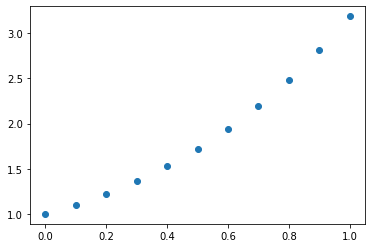

In [4]:
def suma (x,y):
    return x+y
A=np.array(euler(0,1,10,1,suma))
plt.scatter(A[:,0], A[:,1])
plt.show()


In [5]:
sympy.init_printing(use_latex='mathjax')# escribe simbolicamente la ecuación diferencial.
x = sympy.Symbol('x')
y = sympy.Function('y')
# expreso la ecuacion
f = x+(y(x))
sympy.Eq(y(x).diff(x), f)


d                  
──(y(x)) = x + y(x)
dx                 

In [6]:
sol=sympy.dsolve(y(x).diff(x) - f) #Resuelve la ecuación diferencial
ics={ y (0): 1} #condiciones iniciales
sol

       ⎛               -x⎞  x
y(x) = ⎝C₁ + (-x - 1)⋅ℯ  ⎠⋅ℯ 

In [7]:
C_eq = sympy.Eq(sol.lhs.subs(x, 0).subs(ics), sol.rhs.subs(x, 0))#reemplaza condiciones iniciales
C=sympy.solve(C_eq)#soluciona la ecuación del paso anterior
C[0]#imprime la solución

2

In [8]:
y=(2+(-x-1)*sympy.exp(-x))*sympy.exp(x)

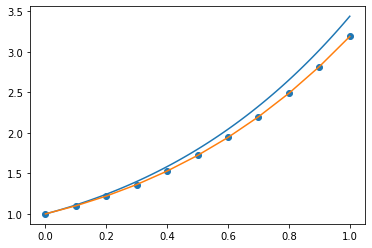

In [9]:
x = np.linspace(0, 1, 100) # Graficar solución analitica
y=(2+(-x-1)*np.exp(-x))*np.exp(x)
plt.plot(x, y)

A=np.array(euler(0,1,10,1,suma))# Graficar puntos solución metodo euler
plt.scatter(A[:,0], A[:,1])

X = np.linspace(0, 1, 11) #graficar poligonal
Y = list(A[:,1])
plt.plot(X, Y)

plt.show()


<h2>El método de Heun (pendiente promedio)</h2>

<h3>Este metodo no permite obtener una aproximación continua a la solución, en lugar de esto se obtiene una aproximación en varios puntos en un intervalo $[a,b]$, dicho conjuntos de puntos, puede ser pensado como los vertices de una poligonal. La diferencia principal respecto al metodo de Euler es que toma los dos extremos de cada subintervalo de la partición para calcular la pendiente.</h3>
    </li>
</ul>

In [10]:
#METODO DE HEUN
def heun (a,b,n,yinicial,funcion):
    h=(b-a)/n
    t=a
    w=yinicial
    listaH=[[t,w]]
    for i in range(n):
        f=funcion(t,w)
        v=w+h*f
        t=a+((i+1)*h)
        w=w+((f+funcion(t,v))*h/2)
        listaH.append([t,w])
    return listaH


# Ejemplo 2
Para la ecuación del ejemplo 1, use tambien el metodo de Heun para aproximar la solución, grafique las soluciones dadas por los dos metodos numéricos, ademas encuentre los errores (usando la solución analítca) de los metodos de Heun y Euler.






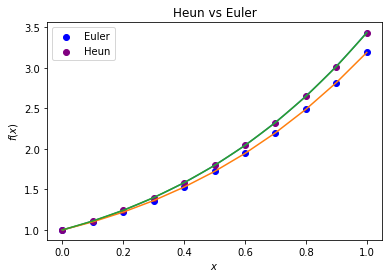

In [11]:
B=heun(0,1,10,1,suma)
B=np.array(B)

plt.scatter(A[:,0], A[:,1], color = 'blue', label='Euler')

plt.scatter(B[:,0], B[:,1], color = 'purple', label='Heun')
#y=e^x\left(-e^{-x}x-e^{-x}+2\right)
X = np.linspace(0, 1, 100)
Ya = np.exp(X)*(-np.exp(-X)*X-np.exp(-X)+2)
plt.plot(X, Ya)

XE = np.linspace(0, 1, 11) #graficar poligonal Euler
YE = list(A[:,1])
plt.plot(XE, YE)

XH = np.linspace(0, 1, 11) #graficar poligonal Heun
YH = list(B[:,1])
plt.plot(XH, YH)

plt.title('Heun vs Euler') #titulo de la grafica
plt.xlabel('$x$') #nombra los ejes
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [12]:
X = np.linspace(0, 1, 11)
YA = np.exp(X)*(-np.exp(-X)*X-np.exp(-X)+2)
YA=list(YA)


In [13]:
YAYE=[]
YAYH=[]
for i in range (11):
    y=YA[i]-YE[i]
    z=YA[i]-YH[i]
    YAYE.append(y)
    YAYH.append(z)
Errores = {'Analítica' : YA, 'Euler': YE, 'Heun':YH, 'A-E':YAYE, 'A-H':YAYH}
data_frame = pd.DataFrame(Errores)
print (data_frame)

    Analítica     Euler      Heun       A-E       A-H
0    1.000000  1.000000  1.000000  0.000000  0.000000
1    1.110342  1.100000  1.110000  0.010342  0.000342
2    1.242806  1.220000  1.242050  0.022806  0.000756
3    1.399718  1.362000  1.398465  0.037718  0.001252
4    1.583649  1.528200  1.581804  0.055449  0.001845
5    1.797443  1.721020  1.794894  0.076423  0.002549
6    2.044238  1.943122  2.040857  0.101116  0.003380
7    2.327505  2.197434  2.323147  0.130071  0.004358
8    2.651082  2.487178  2.645578  0.163904  0.005504
9    3.019206  2.815895  3.012364  0.203311  0.006843
10   3.436564  3.187485  3.428162  0.249079  0.008402


<h2>El método de Runge-Kutta </h2>

<br><br>
<div style="float: center">
    <img src="./images/runge.png" style="width: 80%; float: center; padding-top: 0pt">
    
</div>
    </li>
</ul>
(tomado de Análisis numérico, Richard L.Burden,septima edición)

In [14]:
#Runge kutta
def Runge (a,b,n,yinicial,funcion):
    h=(b-a)/n
    t=a
    w=yinicial
    listaR=[[t,w]]
    for i in range(n):
        m_1=h*funcion(t,w)
        m_2=h*funcion(t+h/2,w+m_1/2)
        m_3=h*funcion(t+h/2,w+m_2/2)
        m_4=h*funcion(t+h,w+m_3)
        w=w+1.0/6.0*(m_1+2.0*m_2+2.0*m_3+m_4)
        t=a+((i+1)*h)
        listaR.append([t,w])
    return listaR


# Ejemplo 3
Para la ecuación del ejemplo 1, use también el metodo de Runge Kutta para aproximar la solución, grafique las soluciones dadas por los tres metodos numéricos, ademas encuentre los errores (usando la solución analítca) de los metodos de Heun, Euler, Runge Kutta.

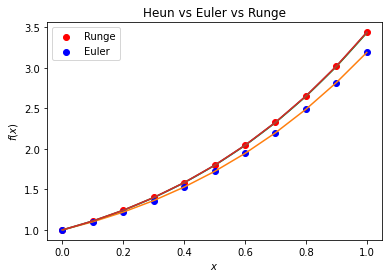

In [15]:
C=Runge(0,1,10,1,suma)
C=np.array(C)

plt.scatter(C[:,0], C[:,1], color = 'red', label='Runge') 

plt.scatter(A[:,0], A[:,1], color = 'blue', label='Euler')

#plt.scatter(B[:,0], B[:,1], color = 'purple', label='Heun')
#y=e^x\left(-e^{-x}x-e^{-x}+2\right)
X = np.linspace(0, 1, 100)
Ya = np.exp(X)*(-np.exp(-X)*X-np.exp(-X)+2)
plt.plot(X, Ya)

XE = np.linspace(0, 1, 11) #graficar poligonal Euler
YE = list(A[:,1])
plt.plot(XE, YE)

XH = np.linspace(0, 1, 11) #graficar poligonal Heun
YH = list(B[:,1])
plt.plot(XH, YH)

XR = np.linspace(0, 1, 11) #graficar poligonal Runge
YR = list(C[:,1])
plt.plot(XR, YR)

plt.title('Heun vs Euler vs Runge') #titulo de la grafica
plt.xlabel('$x$') #nombra los ejes
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [16]:
YAYE=[]
YAYH=[]
YAYR=[]
for i in range (11):
    y=YA[i]-YE[i]
    z=YA[i]-YH[i]
    w=YA[i]-YR[i]
    YAYE.append(y)
    YAYH.append(z)
    YAYR.append(w)
Errores = {'Analítica' : YA, 'Euler': YE, 'Heun':YH, 'Runge':YR, 'A-E':YAYE, 'A-H':YAYH, 'A-R':YAYR}
data_frame = pd.DataFrame(Errores)
print (data_frame)

    Analítica     Euler      Heun     Runge       A-E       A-H           A-R
0    1.000000  1.000000  1.000000  1.000000  0.000000  0.000000  0.000000e+00
1    1.110342  1.100000  1.110000  1.110342  0.010342  0.000342  1.694846e-07
2    1.242806  1.220000  1.242050  1.242805  0.022806  0.000756  3.746190e-07
3    1.399718  1.362000  1.398465  1.399717  0.037718  0.001252  6.210269e-07
4    1.583649  1.528200  1.581804  1.583648  0.055449  0.001845  9.151212e-07
5    1.797443  1.721020  1.794894  1.797441  0.076423  0.002549  1.264207e-06
6    2.044238  1.943122  2.040857  2.044236  0.101116  0.003380  1.676597e-06
7    2.327505  2.197434  2.323147  2.327503  0.130071  0.004358  2.161747e-06
8    2.651082  2.487178  2.645578  2.651079  0.163904  0.005504  2.730400e-06
9    3.019206  2.815895  3.012364  3.019203  0.203311  0.006843  3.394754e-06
10   3.436564  3.187485  3.428162  3.436559  0.249079  0.008402  4.168648e-06


# Ejercicios

## 1) Dadas las siguientes ecuaciones diferenciales, resuelvalas numericamente usando los tres metodos vistos anteriormente, encuentre su solución analítica, y compare el error real de los  metodos. $$y'=te^3t-2y,\ \ \ \ 0\leq t\leq 1, \ \ \ \ y(0)=0, \ \ \ h=0.5,$$  $$y'=1+(t-y)^2,\ \ \ \ 2\leq t\leq 3, \ \ \ \ y(2)=1, \ \ \ h=0.5, $$   $$y'=1+\frac{y}{t},\ \ \ \ 1\leq t\leq 2, \ \ \ \ y(1)=2, \ \ \ h=0.25,$$   $$y'=\cos (2t)+\sin (3t),\ \ \ \ 0\leq t\leq 1, \ \ \ \ y(0)=1, \ \ \ h=0.25,$$

## 2) Dado el problema de valor inicial,  $$y'=te^3t-2y,\ \ \ \ 0\leq t\leq 1, \ \ \ \ y(0)=0, \ \ \ h=0.5,$$ Aproxime $y(5)$ aplicando los tres métodos para $h=0.2$, $h=0.1$, $h=0.05$. Encuentre un h optimo para cada metodo, (Donde el error es mínimo)


## 3) Dado el problema de valor inicial,  $$y'=-10y,\ \ \ \ 0\leq t\leq 2, \ \ \ \ y(0)=1.$$ Explique que sucede cuando aplicamos el metodo de Euler a este problema con $h=0.1$. ¿Sucede el mismo inconveniente con los otros dos métodos?, ¿se soluciona el problema cambiando el valor de $h$?  


## 4) Fluye agua de un tanque cónico invertido provisto de un orificio circular (truncando el cono), con una velocidad $$\frac{dx}{dt}=-0.6 \pi r^2\sqrt{2g}\frac{\sqrt{x}}{A(x)},$$  donde r es el radio del orificio, $x$ es la altura del nivel del líquido medido desde el vértice del cono, y $A(x)$ es el área de la sección transversal del tanque, a x uinidades por arriba del orificio. Suponga que $r=0.1$ pies, $g=32.1 pies/s^2$, y que el tanque tiene un nivel inicial de agua de $8$ pies y un volumen inicial de $512(\frac{\pi}{3})pies^3$. Calcule el nivel del agua sdespués de $10$ min con $h=20\ s $. Determine cuando se vaciara el tanque. 